In [1]:
import numpy as np
import os
import tensorflow as tf

In [2]:
import pathlib

#dataset_url = "https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri/download/archive.zip"
dataset_url = "file:///Users/c_lin/OneDrive/Documents/Learning/Springboard/Data Science/BrainTumor/archive.zip"
data_dir = tf.keras.utils.get_file(fname='brain_tumor.zip',
                                   origin=dataset_url,
                                   extract=True)
data_dir = pathlib.Path(data_dir)

In [3]:
data_dir

WindowsPath('C:/Users/c_lin/.keras/datasets/brain_tumor.zip')

### Prepare train and validation datasets

In [4]:
data_dir = pathlib.Path('C:/Users/c_lin/.keras/datasets/Training')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

2870

In [6]:
import PIL
import PIL.Image

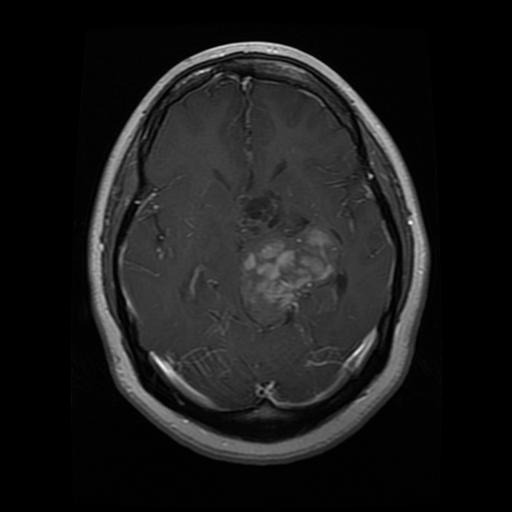

In [7]:
glioma = list(data_dir.glob('glioma_tumor/*'))
PIL.Image.open(str(glioma[0]))

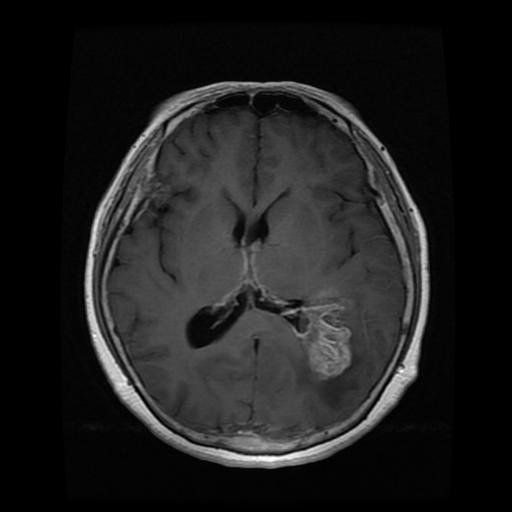

In [8]:
glioma = list(data_dir.glob('glioma_tumor/*'))
PIL.Image.open(str(glioma[1]))

In [9]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [11]:
class_names = train_ds.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

### View the first 9 images from the training dataset

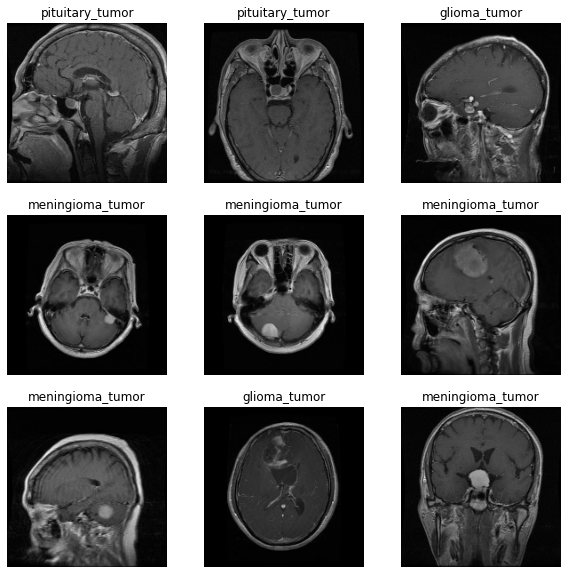

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Training model

In [13]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [16]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [17]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
72/72 [==============================] - 56s 772ms/step - loss: 0.9570 - accuracy: 0.5871 - val_loss: 0.7021 - val_accuracy: 0.7073
Epoch 2/10
72/72 [==============================] - 61s 848ms/step - loss: 0.5688 - accuracy: 0.7709 - val_loss: 0.5682 - val_accuracy: 0.7648
Epoch 3/10
72/72 [==============================] - 61s 845ms/step - loss: 0.3694 - accuracy: 0.8632 - val_loss: 0.4329 - val_accuracy: 0.8275
Epoch 4/10
72/72 [==============================] - 57s 791ms/step - loss: 0.2169 - accuracy: 0.9212 - val_loss: 0.4053 - val_accuracy: 0.8484
Epoch 5/10
72/72 [==============================] - 58s 808ms/step - loss: 0.1410 - accuracy: 0.9521 - val_loss: 0.4441 - val_accuracy: 0.8676
Epoch 6/10
72/72 [==============================] - 53s 735ms/step - loss: 0.1353 - accuracy: 0.9451 - val_loss: 0.6235 - val_accuracy: 0.7927
Epoch 7/10
72/72 [==============================] - 52s 729ms/step - loss: 0.1434 - accuracy: 0.9456 - val_loss: 0.4472 - val_accuracy: 0.8554

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 89, 89, 32)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)        0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        9

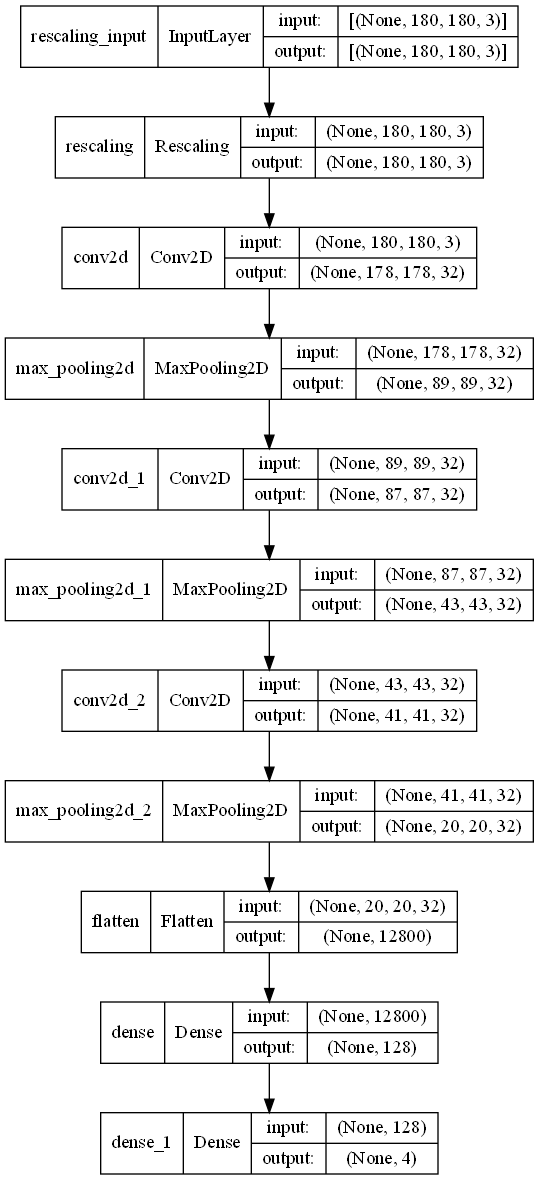

In [19]:
tf.keras.utils.plot_model(model, "brain_tumor_first_model_with_shape_info.png", show_shapes=True)

### Evaluate model performance on the test dataset

In [20]:
data_dir = pathlib.Path('C:/Users/c_lin/.keras/datasets/Testing')

In [21]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

394

In [22]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=None,
    subset=None,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 394 files belonging to 4 classes.


In [23]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_accuracy)

13/13 - 2s - loss: 5.2945 - accuracy: 0.6878 - 2s/epoch - 183ms/step

Test accuracy: 0.6878172755241394


#### Accuracy comparison:
Train accuracy: 99.6%
Validation accuracy: 88.5%
Test accuracy: 